<a href="https://colab.research.google.com/github/sasya05/adm/blob/main/CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Column Names: Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          reviewText sentiment  \
0                                         no issues.  Negative   
1  purchased this for my device, it worked as adv...  Negative   
2  it works as expected. i should have sprung for...  Negative   
3  this think has worked out great.had a diff. br...  Positive   
4  bought it with retail packaging, arrived legit...  Positive   

   sentiment_score  
0          -0.2960  
1          -0.2960  
2          -0.3089  
3           0.7081  
4           0.7087  


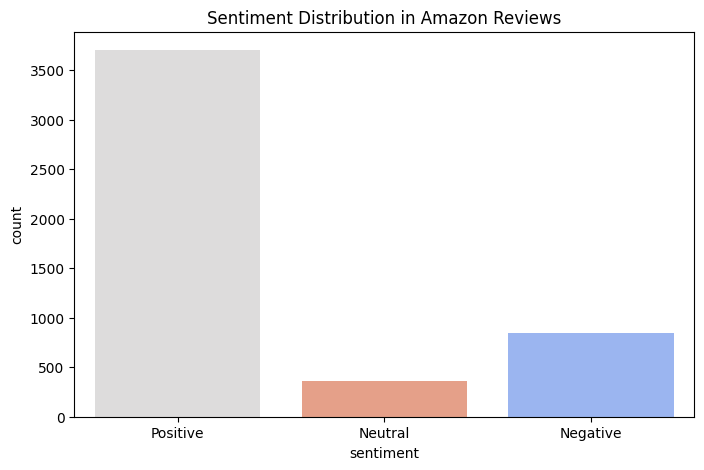

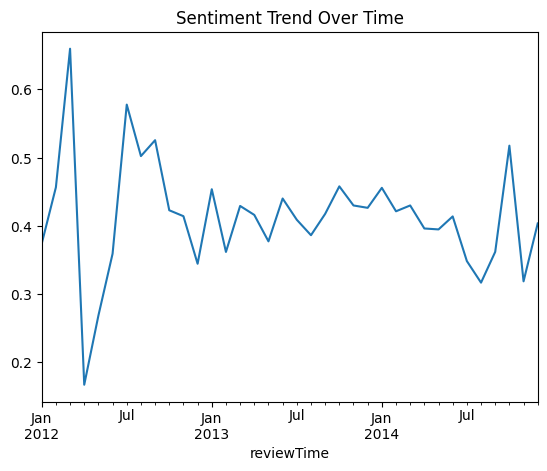

In [8]:
# Install Required Libraries (Run in Terminal if not installed)
# pip install pandas numpy nltk textblob matplotlib seaborn

# Import Necessary Libraries
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("amazon_reviews.csv")

# Display Column Names to Ensure Accuracy
print("Column Names:", df.columns)

# Drop Missing Values in Review Column (Adjust column name as needed)
df.dropna(subset=['reviewText'], inplace=True)

# Convert Text to Lowercase
df['reviewText'] = df['reviewText'].astype(str).apply(lambda x: x.lower())

# Download VADER Lexicon (if running for the first time)
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Perform Sentiment Analysis
df['sentiment_score'] = df['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(lambda x: "Positive" if x > 0.05 else "Negative" if x < -0.05 else "Neutral")

# Display Sample Results
print(df[['reviewText', 'sentiment', 'sentiment_score']].head())

# Visualize Sentiment Distribution (Fixed Warning)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='coolwarm', order=['Positive', 'Neutral', 'Negative'], legend=False)
plt.title("Sentiment Distribution in Amazon Reviews")
plt.legend([],[], frameon=False)  # Remove the automatic legend
plt.show()

# Convert Review Time to Datetime for Trend Analysis
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Visualize Sentiment Trends Over Time
df.groupby(df['reviewTime'].dt.to_period("M"))['sentiment_score'].mean().plot()
plt.title("Sentiment Trend Over Time")
plt.show()